# DSS Imagine Scholar Workshop 9/27
## Introduction to the Data Science Lifecycle

#### _Updated at 4:40 pm on Sept 26_: 

#### A note to our wonderful participants! My apologizies to everyone whose name was not in the SSA dataset. Unfortunately, I had to drop your name from our survey dataset because we would not have been able to make any inferences about your sex and age. Another thing I did to debug the code was to check if there was only one person with that name in the SSA dataset. If so, rather than a make a plot, a sentence will appear in the format: "There is only one (sex) with the name (name)". The final thing I did to debug was display the history of your name, given the gender you identify as, not the inferred sex for your name. For example, Taylor is inferred to be a female name, but our participant might be male. We rather plot the history of the name Taylor for males. The name "claudea" does not have much showing in the plot because there are actually 5 claudeas born in the same year! You can now see the total count for each name in the title of the graph! I hope you enjoyed this interactive demo! 
#### P.s. Feel free to contact me on Facebook if you want to discuss this notebook more in depth! -Armine Nersisyan

Some terms to be familiar with:
- **pandas** - A software library written for the Python programming language for data manipulation and analysis.
- **dataframe** - Pandas equivalent to a table. 
- **series** - Pandas equivalent to a column. _*see the "Series vs DataFrame" screenshot in the files_
- **boolean** - A data type that has two possible values: True or False. True + True = 2. False + False = 0. True + False = 1.
- **string** - A data type that is a finite sequence of characters (letters, numbers, symbols, punctuation marks), enclosed by quotation marks. 
- **distribution** - The possible values for a variable and how often they occur.

As a reminder, these are general four steps of the data science lifecycle:

1. [x] Formulating a question or problem (What can names tell us about the sex and age distribution of a population?)
2. [ ] Acquiring and cleaning data
3. [ ] Conducting exploratory data analysis (We do this in two parts: one for sex, one for age)
4. [ ] Using prediction and inference to draw conclusions (We do this in two parts: one for sex, one for age)
___
The data for this demonstration come from two sources:

1. The survey taken at the beginning of this workshop
2. [Social Security Administration](https://www.ssa.gov/oact/babynames/background.html). The following is a brief background taken from the website:
        
        All names are from Social Security card applications for births that occurred in the United States after 1879. Note that many people born before 1937 never applied for a Social Security card, so their names are not included in our data. For others who did apply, our records may not show the place of birth, and again their names are not included in our data. All data are from a 100% sample of our records on Social Security card applications as of March 2020.


**Note:** Coding might be new and seem scary to many of you. Instead of focusing on the code, focus on the process. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
!pip install seaborn
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [60]:
# load dataset 1: survey responses
responses = pd.read_csv('/work/9_27 Survey (Responses) - Form Responses 1 (11).csv')
responses = responses.rename(columns={'What is your first name?':'name','What is your birthday?':'birthday','What gender do you most identify with?':'sex',})
responses

,Timestamp,name,birthday,sex
0,9/26/2020 9:31:24,Joanne,10/20/2000,Female
1,9/26/2020 9:31:26,Alex,4/12/2000,Male
2,9/26/2020 9:31:28,Kiara,8/1/2000,Female
3,9/26/2020 9:31:31,Noppakan,9/14/2001,Female
4,9/26/2020 9:31:32,Minh-Huy Tran,1/20/2002,Male
5,9/26/2020 9:31:36,Haoyu,2/22/2001,Male
6,9/26/2020 9:31:37,Jihee,10/20/2000,Female
7,9/26/2020 9:31:42,Jennie,1/5/2000,Female
8,9/26/2020 9:31:50,Wyatt Workman,2/3/1998,Male
9,9/26/2020 9:31:52,Megan,8/11/1999,Female


In [61]:
# check for missing values
responses.iloc[:,1:].isnull().sum()

name        0
birthday    0
sex         0
dtype: int64

In [62]:
# drop rows with missing values
responses = responses.dropna()
responses

,Timestamp,name,birthday,sex
0,9/26/2020 9:31:24,Joanne,10/20/2000,Female
1,9/26/2020 9:31:26,Alex,4/12/2000,Male
2,9/26/2020 9:31:28,Kiara,8/1/2000,Female
3,9/26/2020 9:31:31,Noppakan,9/14/2001,Female
4,9/26/2020 9:31:32,Minh-Huy Tran,1/20/2002,Male
5,9/26/2020 9:31:36,Haoyu,2/22/2001,Male
6,9/26/2020 9:31:37,Jihee,10/20/2000,Female
7,9/26/2020 9:31:42,Jennie,1/5/2000,Female
8,9/26/2020 9:31:50,Wyatt Workman,2/3/1998,Male
9,9/26/2020 9:31:52,Megan,8/11/1999,Female


In [63]:
# check to make sure missing values are dropped
responses.iloc[:,1:].isnull().sum()

name        0
birthday    0
sex         0
dtype: int64

In [64]:
# check that participants answered with just their first name

# create a boolean column by checking for a condition, which is if there is only 1 word per name entry
responses['first name only?'] = responses['name'].str.split(" ").str.len() == 1
print("number of incorrect name entries: {}".format((responses['first name only?'] == False).sum()))

# drop the "first name only?" column
responses = responses.drop('first name only?', axis=1)

number of incorrect name entries: 4


In [65]:
# instead of dropping those rows and risk losing data, we can extract the first name using string methods
responses['name'] = responses['name'].str.split(" ").apply(lambda x: x[0])
responses

,Timestamp,name,birthday,sex
0,9/26/2020 9:31:24,Joanne,10/20/2000,Female
1,9/26/2020 9:31:26,Alex,4/12/2000,Male
2,9/26/2020 9:31:28,Kiara,8/1/2000,Female
3,9/26/2020 9:31:31,Noppakan,9/14/2001,Female
4,9/26/2020 9:31:32,Minh-Huy,1/20/2002,Male
5,9/26/2020 9:31:36,Haoyu,2/22/2001,Male
6,9/26/2020 9:31:37,Jihee,10/20/2000,Female
7,9/26/2020 9:31:42,Jennie,1/5/2000,Female
8,9/26/2020 9:31:50,Wyatt,2/3/1998,Male
9,9/26/2020 9:31:52,Megan,8/11/1999,Female


In [66]:
# make sure we are using only first names
responses['first name only?'] = responses['name'].str.split(" ").str.len() == 1
print("number of incorrect name entries: {}".format((responses['first name only?'] == False).sum()))

# drop the "first name only?" column
responses = responses.drop('first name only?', axis=1)

number of incorrect name entries: 0


In [67]:
# standardize the names by making them lowercase, python is case sensitive
responses['name'] = responses['name'].str.lower()
responses

,Timestamp,name,birthday,sex
0,9/26/2020 9:31:24,joanne,10/20/2000,Female
1,9/26/2020 9:31:26,alex,4/12/2000,Male
2,9/26/2020 9:31:28,kiara,8/1/2000,Female
3,9/26/2020 9:31:31,noppakan,9/14/2001,Female
4,9/26/2020 9:31:32,minh-huy,1/20/2002,Male
5,9/26/2020 9:31:36,haoyu,2/22/2001,Male
6,9/26/2020 9:31:37,jihee,10/20/2000,Female
7,9/26/2020 9:31:42,jennie,1/5/2000,Female
8,9/26/2020 9:31:50,wyatt,2/3/1998,Male
9,9/26/2020 9:31:52,megan,8/11/1999,Female


In [68]:
# use existing columns to create a column for age
dob = pd.to_datetime(responses['birthday'])
now = pd.to_datetime(responses['Timestamp'])

# here I am assuming that everyone provided a valid birthday, not in the future
responses['age'] = (now - dob).astype('<m8[Y]').astype(int)

# drop the "timestamp" and "birthday" columns
responses = responses.drop(['Timestamp', 'birthday'],axis=1) 
responses

,name,sex,age
0,joanne,Female,19
1,alex,Male,20
2,kiara,Female,20
3,noppakan,Female,19
4,minh-huy,Male,18
5,haoyu,Male,19
6,jihee,Female,19
7,jennie,Female,20
8,wyatt,Male,22
9,megan,Female,21


We completed the second step of the data science lifecycle. 

1. [x] Formulating a question or problem (What can names tell us about the sex and age distribution of a population?)
2. [x] Acquiring and cleaning data
3. [ ] Conducting exploratory data analysis (We do this in two parts: one for sex, one for age)
4. [ ] Using prediction and inference to draw conclusions (We do this in two parts: one for sex, one for age)

In this next step, we will use the baby names dataset from the [Social Security Administration](https://www.ssa.gov/oact/babynames/) to inform us about our own dataset. 

In [69]:
# load dataset 2: baby names
babynames = [] 
with zipfile.ZipFile("babynames.zip", "r") as zf:
    data_files = [f for f in zf.filelist if f.filename[-3:] == "txt"]
    def extract_year_from_filename(fn):
        return int(fn[3:7])
    for f in data_files:
        year = extract_year_from_filename(f.filename)
        with zf.open(f) as fp:
            df = pd.read_csv(fp, names=["name", "sex", "count"])
            df["year"] = year
            babynames.append(df)
babynames = pd.concat(babynames)

# standardize the names by making them lowercase
babynames['name'] = babynames['name'].str.lower()
babynames

,name,sex,count,year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880
...,...,...,...,...
31949,zyheem,M,5,2019
31950,zykel,M,5,2019
31951,zyking,M,5,2019
31952,zyn,M,5,2019


### Conducting EDA (Part 1: Infer Sex From Name)

In [70]:
# count how many male and female babies were born in total for each name
sex_counts = pd.pivot_table(babynames, index='name', columns='sex', values='count', aggfunc='sum', fill_value=0., margins=True)
sex_counts.head()

sex,F,M,All
name,,,
aaban,0,120,120
aabha,40,0,40
aabid,0,16,16
aabidah,5,0,5
aabir,0,10,10


In [71]:
# create a column for the proportion of females with each name
sex_counts['prop_female'] = sex_counts['F'] / sex_counts['All']
sex_counts

sex,F,M,All,prop_female
name,,,,
aaban,0,120,120,0.000000
aabha,40,0,40,1.000000
aabid,0,16,16,0.000000
aabidah,5,0,5,1.000000
aabir,0,10,10,0.000000
...,...,...,...,...
zyvon,0,7,7,0.000000
zyyanna,6,0,6,1.000000
zyyon,0,6,6,0.000000


### Using Inferences to Draw Conclusion (Part 1: Infer Sex From Name)

In [72]:
# create a function using the proportion of females to infer the sex of the participant, based on name
def sex_from_name(name):
    if name in sex_counts.index:
        prop = sex_counts.loc[name, 'prop_female']
        return 'Female' if prop > 0.5 else 'Male'
    else:
        return np.nan

sex_from_name('armine')

'Female'

In [73]:
# create a column in our dataset of the sex inferences by applying the sex_from_name function 
responses['inferred sex'] = responses['name'].apply(sex_from_name)
responses

,name,sex,age,inferred sex
0,joanne,Female,19,Female
1,alex,Male,20,Male
2,kiara,Female,20,Female
3,noppakan,Female,19,NaN
4,minh-huy,Male,18,NaN
5,haoyu,Male,19,Male
6,jihee,Female,19,NaN
7,jennie,Female,20,Female
8,wyatt,Male,22,Male
9,megan,Female,21,Female


In [74]:
# drop the names that are not in the SSA dataset, indicated by the value 'nan' in the 'inferred sex' column
responses = responses.dropna()
responses

,name,sex,age,inferred sex
0,joanne,Female,19,Female
1,alex,Male,20,Male
2,kiara,Female,20,Female
5,haoyu,Male,19,Male
7,jennie,Female,20,Female
8,wyatt,Male,22,Male
9,megan,Female,21,Female
10,hannah,Female,20,Female
11,frances,Female,21,Female
12,tyler,Male,20,Male


In [75]:
# What does the INFERRED sex distribution look like?
responses['inferred sex'].value_counts()

Female    16
Male      11
Name: inferred sex, dtype: int64

In [76]:
# How does that compare to the ACTUAL sex distribution? [Take volunteers to describe results]
# Things you want to point out are: 1) Same number of males, 2) Different number of categories,
# 3) We can assume that at least 2 people do not identify as the sex they were assigned
responses['sex'].value_counts()

Female    14
Male      11
Other      2
Name: sex, dtype: int64

### Discussion Question 1: In what ways can data be unethical? Think about the type of data, its source, how it was actually collected, and what it was used for.

### Discussion Question 2: What can data scientists do to produce ethical data?

In [77]:
# How accurate were our sex inferences?
responses['correct sex guesses'] = (responses['sex'] == responses['inferred sex'])
incorrect_sexes = (responses['correct sex guesses'] == False).sum()
print("number of incorrect sex inferences: {}".format(incorrect_sexes))
print("number of particpants: {}".format(len(responses)))
print("accuracy: {}%".format(((len(responses)-incorrect_sexes)/len(responses)*100).round(2)))

number of incorrect sex inferences: 2
number of particpants: 27
accuracy: 92.59%


### Conducting EDA (Part 2: Infer Age From Name)

In [78]:
# create a dataframe of the average age of individuals with each name
def avg_age(group):
    return 2020 - np.average(group['year'], weights=group['count']).round()

avg_age = (babynames.groupby('name').apply(avg_age).rename('avg_age').to_frame())
avg_age.head()

,avg_age
name,
aaban,6.0
aabha,6.0
aabid,7.0
aabidah,2.0
aabir,3.0


In [79]:
# create a function to infer the age of participant, based on name
def age_from_name(name):
    if name in avg_age.index:
        return avg_age.loc[name, 'avg_age']
    else:
        return 0

age_from_name('claudea')

68.0

In [80]:
# apply the age_from_name function to create a column of the age inferences in our own dataset
responses['inferred age'] = responses['name'].apply(age_from_name) * 1
responses = responses.drop(['inferred sex', 'correct sex guesses'], axis=1)
responses

,name,sex,age,inferred age
0,joanne,Female,19,68.0
1,alex,Male,20,34.0
2,kiara,Female,20,18.0
5,haoyu,Male,19,4.0
7,jennie,Female,20,91.0
8,wyatt,Male,22,13.0
9,megan,Female,21,29.0
10,hannah,Female,20,24.0
11,frances,Female,21,87.0
12,tyler,Male,20,23.0


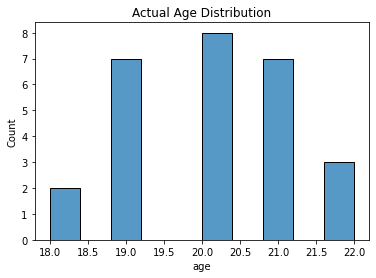

In [81]:
# histogram of the actual age distribution of the participants
sns.histplot(responses['age'], bins=(10))
plt.title('Actual Age Distribution')
plt.show()

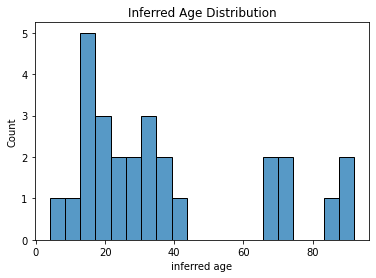

In [82]:
# histogram of the inferred age distribution of the participants
sns.histplot(responses['inferred age'], bins=(20))
plt.title('Inferred Age Distribution') 
plt.show()

In [83]:
# What is the INFERRED average age?
responses['inferred age'].mean()

37.592592592592595

In [84]:
# How does that compare to the ACTUAL average age?
responses['age'].mean()

20.074074074074073

In [85]:
# How accurate were our age inferences?
responses['correct age guesses'] = (responses['age'] == responses['inferred age'])
incorrect_ages = (responses['correct age guesses'] == False).sum()
print("number of incorrect age inferences: {}".format((responses['correct age guesses'] == False).sum()))
print("number of particpants: {}".format(len(responses)))
print("accuracy: {}%".format(((len(responses)-incorrect_ages)/len(responses)*100).round(2)))

number of incorrect age inferences: 27
number of particpants: 27
accuracy: 0.0%


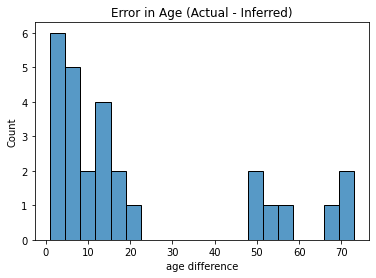

In [86]:
# histogram showing the magnitude of how wrong our age inferences were
# Things to notice: 1) Values are mostly grouped in the lower region, so we were mostly off by about 1 to 20.
responses['age difference'] = np.abs(responses['age'] - responses['inferred age'])
sns.histplot(responses['age difference'], bins=(20))
plt.title('Error in Age (Actual - Inferred)')
plt.show();

We completed the third and fourth steps of the data science lifecycle. 

1. [x] Formulating a question or problem (What can names tell us about the sex and age distribution of a population?)
2. [x] Acquiring and cleaning data
3. [x] Conducting exploratory data analysis (We did this in two parts)
4. [x] Using prediction and inference to draw conclusions (We did this in two parts)

There is no information on the name armine and the provided gender identity
There is no information on the name sabrina and the provided gender identity


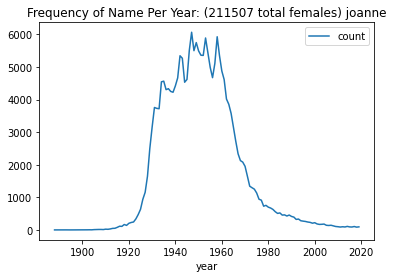

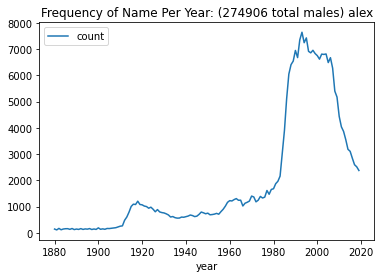

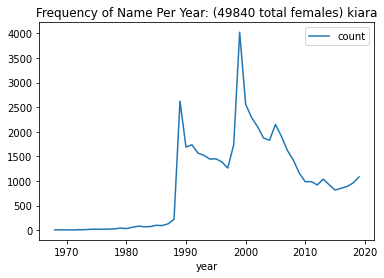

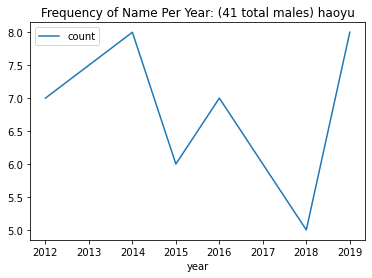

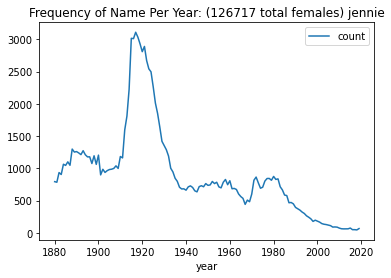

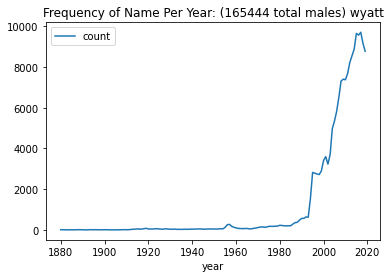

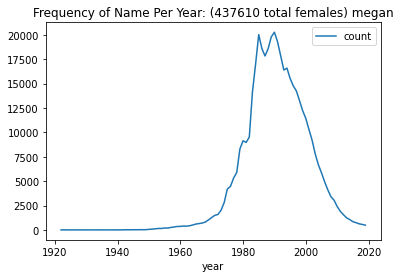

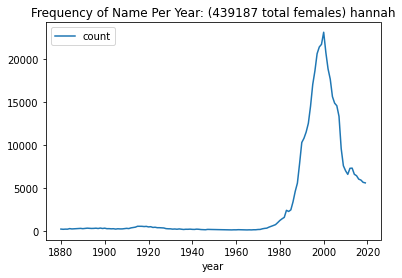

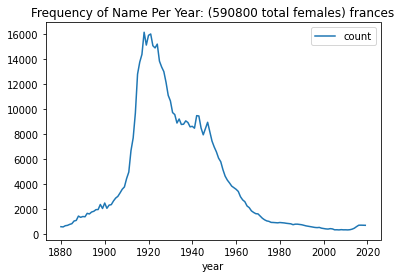

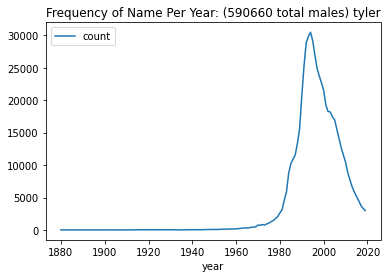

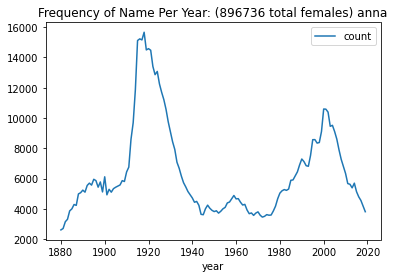

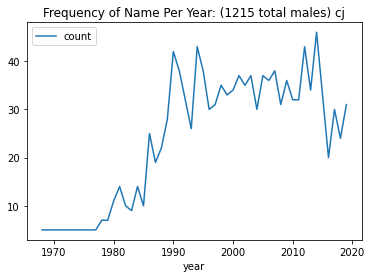

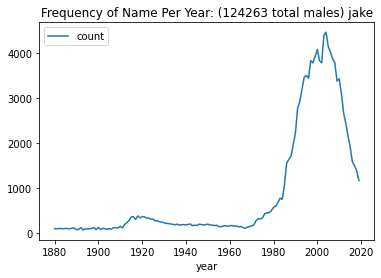

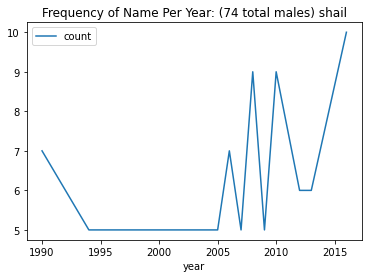

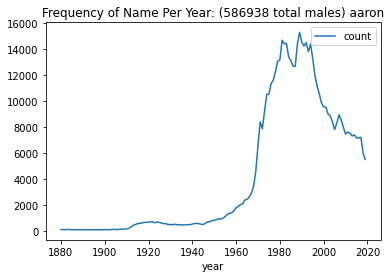

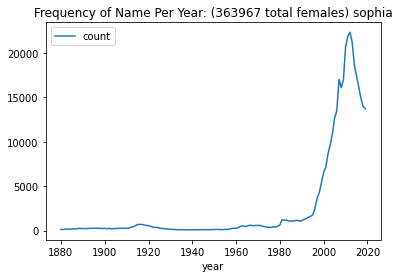

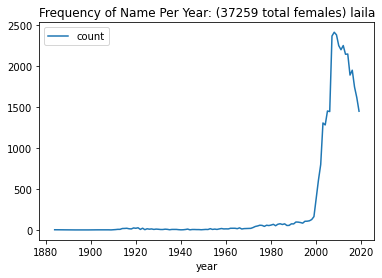

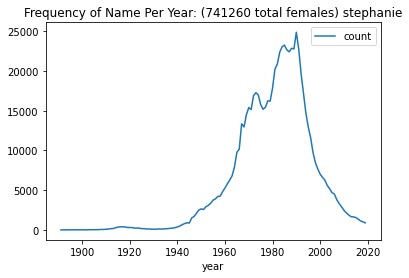

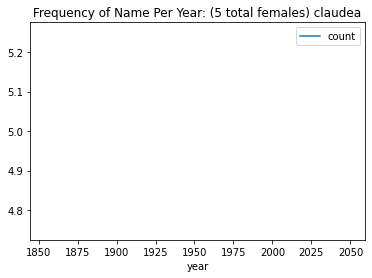

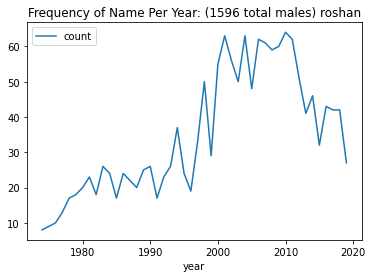

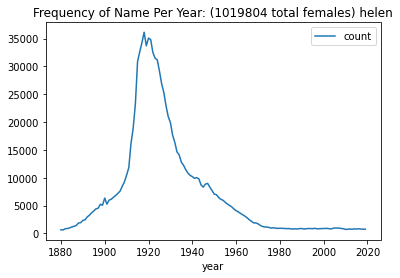

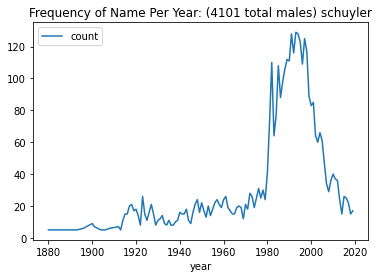

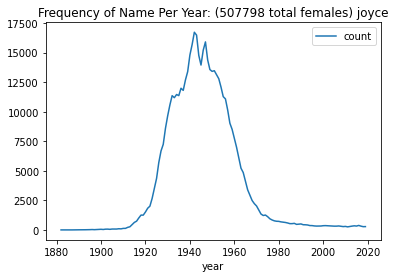

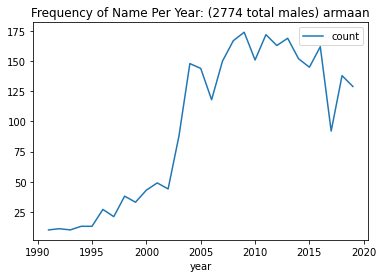

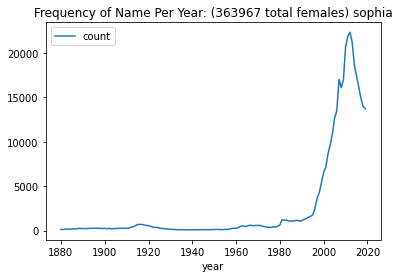

In [87]:
# For fun, let's take a look at the history of your name, given your gender. Keep in mind this is only for the US.
SSA_indexed_names = babynames.set_index('name').sort_values('year')
survey_indexed_names = responses.set_index('name')

for name, row in survey_indexed_names.iterrows():
    SSA_row = SSA_indexed_names.loc[[name]]
    survey_row = survey_indexed_names.loc[[name]]
    if survey_row['sex'][0]== 'Female':
        if sex_counts.loc[[name]]['F'].iloc[0] == 1:
            print("There is one female with the name "+name)
        else:
            SSA_row[SSA_row['sex'] == 'F'].plot(x='year', y='count', title="Frequency of Name Per Year: ({} total females) ".format(sex_counts.loc[[name]]['F'].iloc[0])+name)
            plt.rcParams.update({'figure.max_open_warning': 0})
    elif survey_row['sex'][0] == 'Male':
        if sex_counts.loc[[name]]['M'].iloc[0] == 1:
            print("There is one male with the name "+_name)
        else:
            SSA_row[SSA_row['sex'] == 'M'].plot(x='year', y='count', title="Frequency of Name Per Year: ({} total males) ".format(sex_counts.loc[[name]]['M'].iloc[0])+name)
            plt.rcParams.update({'figure.max_open_warning': 0})
    else: print("There is no information on the name "+name+" and the provided gender identity");

In [88]:
# only five claudeas all born in the same year :O
claudeas = babynames[babynames['name'] == 'claudea']
claudeas

,name,sex,count,year
5693,claudea,F,5,1952


# Thank you for joining us today!!

#### Here are some readings to get you thinking about data ethics: 

1. Kelsey Piper - [The UK used a formula to predict students’ scores for canceled exams. Guess who did well.](https://www.vox.com/future-perfect/2020/8/22/21374872/uk-united-kingdom-formula-predict-student-test-scores-exams)
2. Shea Swauger - [Our Bodies Encoded: Algorithmic Test Proctoring in Higher Education](https://hybridpedagogy.org/our-bodies-encoded-algorithmic-test-proctoring-in-higher-education/)
3. Misha Angrist - [Do you belong to you?](http://www.genomemag.com/do-you-belong-to-you/)
4. Joel Best - [Damned Lies and Statistics p1-29](https://portal.tpu.ru/SHARED/k/KITAEVA/statistics/book/Tab3/damnedstatistics.pdf)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=620cc714-dd0a-427f-ad66-c45b15c7ecf6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>